[![Open in Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/aldomunaretto/immune_deep_learning/blob/main/notebooks/04_NLP/24_NLP_NER_in_Spain.ipynb)

<h1><font color="#113D68" size=6>Procesamiento del Lenguaje Natural</font></h1>

<h1><font color="#113D68" size=5>Reconocimiento de entidades en Español</font></h1>

---

<a id="indice"></a>
<h2><font color="#004D7F" size=5>Índice</font></h2>

* [0. Contexto](#section0)
* [1. Instalar librerías](#section1)
* [2. Comprobar el modelo de lenguaje](#section2)
* [3. Tarea de reconocimiento de entidad nombrada](#section3)
* [4. Dataset NER](#section4)
* [5. Finetuning](#section5)
    * [5.1. Descargar el Tokenizer](#section51)
    * [5.2. Preparar el dataset](#section52)
    * [5.3. Preparar el modelo](#section53)
    * [5.5. Preparar los argumentos](#section54)
    * [5.5. Entrenamiento](#section55)
    * [5.6. Ejecutar el modelo](#section56)

---
<div style="text-align: right"> <font size=5> <a href="#indice"><i class="fa fa-arrow-circle-up" aria-hidden="true" style="color:#004D7F"></i></a></font></div>

---

<a id="section0"></a>
# <font color="#004D7F" size=6>0. Contexto</font>

Configure el portátil para usar una GPU.
    - Entorno de ejecución -> Cambiar entorno de ejecución -> Aceleración de hardware -> GPU

<div class="alert alert-block alert-info">
    
<i class="fa fa-info-circle" aria-hidden="true"></i>
Más información sobre [HuggingFace](https://huggingface.co)

---
<div style="text-align: right"> <font size=5> <a href="#indice"><i class="fa fa-arrow-circle-up" aria-hidden="true" style="color:#004D7F"></i></a></font></div>

---

<a id="section1"></a>
# <font color="#004D7F" size=6>1. Instalar librerías</font>

In [1]:
!pip install datasets -q
!pip install transformers -q
!pip install seqeval -q
!pip install --upgrade accelerate

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 547.8/547.8 kB 8.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.8/40.8 MB 34.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 11.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.9/64.9 kB 5.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 14.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 13.6 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
cudf-cu12 24.4.1 requires pyarrow<15.0.0a0,>=14.0.1, but you have pyarrow 16.1.0 which is incompatible.
google-colab 1.0.0 requires requests==2.31.0, but you have requests 2.32.3 which is incompatible.
ibis-framework 8.0.0 requires pyarrow<16,>=2, but you have pyarrow 16.1.0 which is incompatible.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

---
<div style="text-align: right"> <font size=5> <a href="#indice"><i class="fa fa-arrow-circle-up" aria-hidden="true" style="color:#004D7F"></i></a></font></div>

---

<a id="section2"></a>
# <font color="#004D7F" size=6>2. Comprobar el modelo de lenguaje</font>

¿Cuál es el significado de las 3 palabras clave `roberta-base-bne`?

<div class="alert alert-block alert-info">
    
<i class="fa fa-info-circle" aria-hidden="true"></i>
Más información sobre [RoBERTa base](https://huggingface.co/PlanTL-GOB-ES/roberta-base-bne)

In [2]:
from transformers import pipeline
from pprint import pprint
unmasker = pipeline('fill-mask', model='PlanTL-GOB-ES/roberta-base-bne')


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/613 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/499M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/1.39k [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/851k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/509k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/2.21M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/957 [00:00<?, ?B/s]

Los pipelines son útiles para ejecutar modelos, pero este no es nuestro caso, queremos crear uno

In [3]:
pprint(unmasker(""))

PipelineException: No mask_token (<mask>) found on the input

---
<div style="text-align: right"> <font size=5> <a href="#indice"><i class="fa fa-arrow-circle-up" aria-hidden="true" style="color:#004D7F"></i></a></font></div>

---

<a id="section3"></a>
# <font color="#004D7F" size=6>3. Tarea de reconocimiento de entidad nombrada</font>

Originalmente, la idea era encontrar entidades nombradas (nombres de personas, ubicaciones, organizaciones...) y clasificarlas.

Sin embargo, ahora puede ser cualquier cosa adjunta a una clasificación.

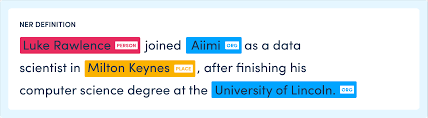

La forma en que los modelos abordan esta tarea es convertirla en un problema de clasificación de tokens, en el que cada palabra tiene una etiqueta.

Fine tuning.svg

---
<div style="text-align: right"> <font size=5> <a href="#indice"><i class="fa fa-arrow-circle-up" aria-hidden="true" style="color:#004D7F"></i></a></font></div>

---

<a id="section4"></a>
# <font color="#004D7F" size=6>4. Dataset NER</font>

Vamos a utilizar uno de los conjuntos de datos más comunes en NER. CoNLL 2002.

Este conjunto de datos contiene oraciones en diferentes idiomas con entidades nombradas anotadas. Los tipos de entidades nombradas incluyen: personas, ubicaciones, organizaciones y nombres de entidades misceláneas.

<div class="alert alert-block alert-info">
    
<i class="fa fa-info-circle" aria-hidden="true"></i>
Más información sobre [CoNLL 2002 oficial](https://plantl.mineco.gob.es/tecnologias-lenguaje/catalogo-TL/campanas-evaluacion/Paginas/conll-2002.aspx)

<div class="alert alert-block alert-info">
    
<i class="fa fa-info-circle" aria-hidden="true"></i>
Más información sobre [CoNLL 2002 HuggingFace](https://huggingface.co/datasets/conll2002)

In [4]:
from datasets import load_dataset

dataset = load_dataset("PlanTL-GOB-ES/CoNLL-NERC-es")

Generating train split:   0%|          | 0/8324 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/1916 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/1518 [00:00<?, ? examples/s]

Lets see a particular row

In [5]:
dataset

DatasetDict({
    train: Dataset({
        features: ['id', 'tokens', 'pos_tags', 'ner_tags'],
        num_rows: 8324
    })
    validation: Dataset({
        features: ['id', 'tokens', 'pos_tags', 'ner_tags'],
        num_rows: 1916
    })
    test: Dataset({
        features: ['id', 'tokens', 'pos_tags', 'ner_tags'],
        num_rows: 1518
    })
})

In [ ]:
pprint(dataset['train'][2])

{'id': '2',
 'ner_tags': [0,
              1,
              2,
              2,
              2,
              0,
              1,
              2,
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              7,
              0],
 'pos_tags': [4,
              28,
              1,
              40,
              28,
              13,
              47,
              28,
              13,
              47,
              38,
              4,
              28,
              40,
              49,
              28,
              40,
    

DatasetInput.svg

---
<div style="text-align: right"> <font size=5> <a href="#indice"><i class="fa fa-arrow-circle-up" aria-hidden="true" style="color:#004D7F"></i></a></font></div>

---

<a id="section5"></a>
# <font color="#004D7F" size=6>5. Finetuning</font>

Vamos a:
1. Descargar el tokenizador de nuestro modelo de lenguaje
1. Preparar los datos para el modelo. Tokenízalo y ponle las etiquetas correctas
1. Ajustar el modelo de lenguaje (pesos) en un modelo para la clasificación de secuencias
1. Preparar los argumentos de entrenamiento
1. Entrenar



Copia de Fine tuning.svg

---
<div style="text-align: right"> <font size=5> <a href="#indice"><i class="fa fa-arrow-circle-up" aria-hidden="true" style="color:#004D7F"></i></a></font></div>

---

<a id="section51"></a>
# <font color="#004D7F" size=5>5.1. Descargar el Tokenizer</font>

El aprendizaje automático sabe de números, no de cadenas. Así que vamos a darle al diccionario de las etiquetas

In [6]:
from transformers import AutoTokenizer


language_model = 'PlanTL-GOB-ES/roberta-base-bne'
#language_model = 'dccuchile/bert-base-spanish-wwm-cased' # BETO


tokenizer = AutoTokenizer.from_pretrained(language_model, add_prefix_space=True, truncation=True, max_lenght=512)

why `Auto`?
- Porque está encapsulando el modelo y es agnóstico al lenguaje. Es decir, construye para los lenguajes, e.g., pytorch y tensorflow de manera que carga automáticamente sin tener que poner tf o pt

In [7]:
tokenizer('Hola mundo')

{'input_ids': [0, 30718, 1077, 2], 'attention_mask': [1, 1, 1, 1]}

In [8]:
tokenizer.decode([0, 30718, 1077, 2])

'<s> Hola mundo</s>'

---
<div style="text-align: right"> <font size=5> <a href="#indice"><i class="fa fa-arrow-circle-up" aria-hidden="true" style="color:#004D7F"></i></a></font></div>

---

<a id="section52"></a>
# <font color="#004D7F" size=5>5.2. Preparar el dataset</font>

In [9]:
labels_list = "O", "B-PER", "I-PER", "B-ORG", "I-ORG", "B-LOC", "I-LOC", "B-MISC", "I-MISC"
label_num_list= list(range(0,len(labels_list)))

In [10]:
label2id={}
id2label={}
for label,num in zip(labels_list,label_num_list):
  label2id[label]=num
  id2label[num]=label

In [11]:
label2id

{'O': 0,
 'B-PER': 1,
 'I-PER': 2,
 'B-ORG': 3,
 'I-ORG': 4,
 'B-LOC': 5,
 'I-LOC': 6,
 'B-MISC': 7,
 'I-MISC': 8}

Convertimos todo el texto en tokens estructurados según las etiquetas definidas. Los que no se encuentre en estas etiquetas tendrá el token 0

In [12]:
task = "ner"
def tokenize_and_align_labels(examples):
    label_all_tokens = True
    tokenized_inputs = tokenizer(list(examples["tokens"]), truncation=True, is_split_into_words=True) # Tokenize the given input tokens

    labels = []
    for i, label in enumerate(examples[f"{task}_tags"]):
        word_ids = tokenized_inputs.word_ids(batch_index=i)
        previous_word_idx = None
        label_ids = []
        for word_idx in word_ids:
            if word_idx is None:
                label_ids.append(-100)
            elif label[word_idx] == '0':
                label_ids.append(0)
            elif word_idx != previous_word_idx:
                label_ids.append(label[word_idx])#(label2id[label[word_idx]])
            else:
                label_ids.append(label[word_idx] if label_all_tokens else -100)#(label2id[label[word_idx]] if label_all_tokens else -100)
            previous_word_idx = word_idx
        labels.append(label_ids)

    tokenized_inputs["labels"] = labels
    return tokenized_inputs



DatasetProcessed (1).svg

In [13]:
train_dataset = dataset['train']
valid_dataset= dataset['validation']
test_dataset = dataset['test']

train_tokenized_datasets = train_dataset.map(tokenize_and_align_labels, batched=True)
valid_tokenized_datasets = valid_dataset.map(tokenize_and_align_labels, batched=True)
test_tokenized_datasets = test_dataset.map(tokenize_and_align_labels, batched=True)

Map:   0%|          | 0/8324 [00:00<?, ? examples/s]

Map:   0%|          | 0/1916 [00:00<?, ? examples/s]

Map:   0%|          | 0/1518 [00:00<?, ? examples/s]

<div class="alert alert-block alert-info">
    
<i class="fa fa-info-circle" aria-hidden="true"></i>
Más información sobre [batched mapping](https://huggingface.co/docs/datasets/about_map_batch)

### Esto es solo para la clase
Eliminamos la mitad del conjunto de datos

In [14]:
pruned_train_dataset = train_tokenized_datasets.select(
    (
        i for i in range(int (len(train_tokenized_datasets)/2)+1)

    )
)

Parameter 'indices'=<generator object <genexpr> at 0x7f4b36a0f920> of the transform datasets.arrow_dataset.Dataset.select couldn't be hashed properly, a random hash was used instead. Make sure your transforms and parameters are serializable with pickle or dill for the dataset fingerprinting and caching to work. If you reuse this transform, the caching mechanism will consider it to be different from the previous calls and recompute everything. This warning is only showed once. Subsequent hashing failures won't be showed.


---
<div style="text-align: right"> <font size=5> <a href="#indice"><i class="fa fa-arrow-circle-up" aria-hidden="true" style="color:#004D7F"></i></a></font></div>

---

<a id="section53"></a>
# <font color="#004D7F" size=5>5.3. Preparar el modelo</font>

Preparación del modelo. Vamos a crear un `ModelForTokenClassification`

<div class="alert alert-block alert-info">
    
<i class="fa fa-info-circle" aria-hidden="true"></i>
Más información sobre [AutoModelForTokenClassification()](https://huggingface.co/transformers/v3.0.2/model_doc/auto.html)

In [15]:
from transformers import AutoModelForTokenClassification, TrainingArguments, Trainer

model = AutoModelForTokenClassification.from_pretrained(language_model, num_labels=len(labels_list), id2label=id2label, label2id=label2id)

Some weights of RobertaForTokenClassification were not initialized from the model checkpoint at PlanTL-GOB-ES/roberta-base-bne and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


---
<div style="text-align: right"> <font size=5> <a href="#indice"><i class="fa fa-arrow-circle-up" aria-hidden="true" style="color:#004D7F"></i></a></font></div>

---

<a id="section54"></a>
# <font color="#004D7F" size=5>5.4. Preparar los argumentos</font>

Etrenar con los argumentos establecidos

In [16]:
batch_size=16
epochs= 2
args = TrainingArguments(
    "spanish-ner",
    evaluation_strategy = "epoch",
    per_device_train_batch_size=batch_size,
    per_device_eval_batch_size=batch_size,
    num_train_epochs=epochs,
    weight_decay = 1e-5,
    learning_rate=1e-4
)

/usr/local/lib/python3.10/dist-packages/transformers/training_args.py:1474: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(


<div class="alert alert-block alert-info">
    
<i class="fa fa-info-circle" aria-hidden="true"></i>
Más información [TrainingArguments()](https://huggingface.co/transformers/v4.8.2/main_classes/trainer.html?highlight=trainingarguments#transformers.TrainingArguments)

El DataCollator prepara los datos automáticamenyte para el modelo. En este caso hace el padding por ejemplo

In [17]:
from transformers import DataCollatorForTokenClassification

data_collator = DataCollatorForTokenClassification(tokenizer)

<div class="alert alert-block alert-info">
    
<i class="fa fa-info-circle" aria-hidden="true"></i>
Más información [DataCollatorForTokenClassification()](https://huggingface.co/docs/transformers/main_classes/data_collator#transformers.DataCollatorForTokenClassification)

Evaluación del modelo

In [18]:
from datasets import load_metric
import numpy as np

metric = load_metric("seqeval")
def compute_metrics(p):
    predictions, labels = p
    predictions = np.argmax(predictions, axis=2)

    true_predictions = [[labels_list[p] for (p, l) in zip(prediction, label) if l != -100] for prediction, label in zip(predictions, labels)]
    true_labels = [[labels_list[l] for (p, l) in zip(prediction, label) if l != -100] for prediction, label in zip(predictions, labels)]

    results = metric.compute(predictions=true_predictions, references=true_labels)
    return {"precision": results["overall_precision"], "recall": results["overall_recall"], "f1": results["overall_f1"], "accuracy": results["overall_accuracy"]}




<ipython-input-18-969267115818>:4: FutureWarning: load_metric is deprecated and will be removed in the next major version of datasets. Use 'evaluate.load' instead, from the new library 🤗 Evaluate: https://huggingface.co/docs/evaluate
  metric = load_metric("seqeval")


The repository for seqeval contains custom code which must be executed to correctly load the dataset. You can inspect the repository content at https://hf.co/datasets/seqeval.
You can avoid this prompt in future by passing the argument `trust_remote_code=True`.

Do you wish to run the custom code? [y/N] y


---
<div style="text-align: right"> <font size=5> <a href="#indice"><i class="fa fa-arrow-circle-up" aria-hidden="true" style="color:#004D7F"></i></a></font></div>

---

<a id="section55"></a>
# <font color="#004D7F" size=5>5.5. Entrenamiento</font>

In [19]:
trainer = Trainer(
    model,
    args,
    train_dataset=pruned_train_dataset,
    eval_dataset=test_tokenized_datasets,
    data_collator=data_collator,
    tokenizer=tokenizer,
    compute_metrics=compute_metrics
)

trainer.train()

Epoch,Training Loss,Validation Loss,Precision,Recall,F1,Accuracy
1,No log,0.224607,0.428978,0.508236,0.465256,0.931500
2,0.225000,0.155269,0.703596,0.765033,0.733029,0.967291


TrainOutput(global_step=522, training_loss=0.22081393528715404, metrics={'train_runtime': 49.2591, 'train_samples_per_second': 169.025, 'train_steps_per_second': 10.597, 'total_flos': 357127487023032.0, 'train_loss': 0.22081393528715404, 'epoch': 2.0})

<div class="alert alert-block alert-info">
    
<i class="fa fa-info-circle" aria-hidden="true"></i>
Más información [Trainer()](https://huggingface.co/docs/transformers/main_classes/trainer)

Guardamos el modelo entrenado

In [20]:
trainer.save_model('my_ner_model')

---
<div style="text-align: right"> <font size=5> <a href="#indice"><i class="fa fa-arrow-circle-up" aria-hidden="true" style="color:#004D7F"></i></a></font></div>

---

<a id="section56"></a>
# <font color="#004D7F" size=5>5.6. Ejecutar el modelo</font>

In [21]:
from transformers import pipeline
from pprint import pprint
myner = pipeline('ner', model='my_ner_model', aggregation_strategy="simple")

Opciones para aggregation:
- "none" : Will simply not do any aggregation and simply return raw results from the model
- "simple" : Will attempt to group entities following the default schema. (A, B-TAG), (B, I-TAG), (C,I-TAG), (D, B-TAG2) (E, B-TAG2) will end up being [{"word": ABC, "entity": "TAG"}, {"word": "D", "entity": "TAG2"}, {"word": "E", "entity": "TAG2"}] Notice that two consecutive B tags will end up as different entities. On word based languages, we might end up splitting words undesirably : Imagine Microsoft being tagged as [{"word": "Micro", "entity": "ENTERPRISE"}, {"word": "soft", "entity":"NAME"}]. Look for FIRST, MAX, AVERAGE for ways to mitigate that and disambiguate words (on languages that support that meaning, which is basically tokens separated by a space). These mitigations will only work on real words, "New york" might still be tagged with two different entities.
- "first" : (works only on word based models) Will use the `SIMPLE` strategy except that words, cannot end up with different tags. Words will simply use the tag of the first token of the word when there is ambiguity.
- "average" : (works only on word based models) Will use the `SIMPLE` strategy except that words, cannot end up with different tags. scores will be averaged first across tokens, and then the maximum label is applied.
- "max" : (works only on word based models) Will use the `SIMPLE` strategy except that words, cannot end up with different tags. Word entity will simply be the token with the maximum score.

In [47]:
text = """
Albert Fernandez Martinez es amigo de Einstein was a theoretical physicist who developed the theory of relativity.
He can be reached at albert.einstein@example.com or 0034-123-456-789.
For further information, contact Gonzalo Hernando Alvarez at the office at +34.555.123.456 or OFfice@example.org.
645969894. Además tenía un dni como este 50999266C o era 50999266-T y su nombre era Luis fernández
"""

In [42]:
test = """
Estimado Antoni Obrados,

Lamentablemente, después de una cuidadosa consideración, hemos decidido poner fin a su empleo en nuestra organización. Su comportamiento y actitud han demostrado ser inaceptables, y creemos que es lo mejor para ambas partes seguir caminos separados.

Le deseamos lo mejor en sus futuros esfuerzos y esperamos que encuentre una oportunidad más adecuada para su perfil.

Atentamente,

Gonzalo Hernando
"""

In [43]:
pprint(myner(test))

[{'end': 0,
  'entity_group': 'MISC',
  'score': 0.7677457,
  'start': 0,
  'word': ' '},
 {'end': 16,
  'entity_group': 'PER',
  'score': 0.82490796,
  'start': 10,
  'word': ' Antoni'},
 {'end': 20,
  'entity_group': 'PER',
  'score': 0.78066736,
  'start': 17,
  'word': ' Obr'},
 {'end': 24,
  'entity_group': 'PER',
  'score': 0.81187224,
  'start': 20,
  'word': 'ados'},
 {'end': 27,
  'entity_group': 'MISC',
  'score': 0.44822526,
  'start': 25,
  'word': '\n\n'},
 {'end': 411,
  'entity_group': 'MISC',
  'score': 0.49209675,
  'start': 410,
  'word': '\n'},
 {'end': 427,
  'entity_group': 'PER',
  'score': 0.6887847,
  'start': 411,
  'word': 'Gonzalo Hernando'}]


In [44]:
from transformers import pipeline

nlp_ner = pipeline(
    "ner",
    model="mrm8488/bert-spanish-cased-finetuned-ner",
    tokenizer=(
        'mrm8488/bert-spanish-cased-finetuned-ner',
        {"use_fast": False}
))

#text = 'Mis amigos están pensando viajar a Londres este verano'

nlp_ner(test)

Some weights of the model checkpoint at mrm8488/bert-spanish-cased-finetuned-ner were not used when initializing BertForTokenClassification: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight']
- This IS expected if you are initializing BertForTokenClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForTokenClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Asking to truncate to max_length but no maximum length is provided and the model has no predefined maximum length. Default to no truncation.


[{'entity': 'B-PER',
  'score': 0.9997472,
  'index': 3,
  'word': 'Antoni',
  'start': None,
  'end': None},
 {'entity': 'I-PER',
  'score': 0.9995065,
  'index': 4,
  'word': 'Obra',
  'start': None,
  'end': None},
 {'entity': 'I-PER',
  'score': 0.99917454,
  'index': 5,
  'word': '##dos',
  'start': None,
  'end': None},
 {'entity': 'B-PER',
  'score': 0.9996106,
  'index': 73,
  'word': 'Gonzalo',
  'start': None,
  'end': None},
 {'entity': 'I-PER',
  'score': 0.9997415,
  'index': 74,
  'word': 'Hern',
  'start': None,
  'end': None},
 {'entity': 'I-PER',
  'score': 0.99934715,
  'index': 75,
  'word': '##ando',
  'start': None,
  'end': None}]

In [45]:
from transformers import pipeline

nlp_ner = pipeline(
    "ner",
    model="MMG/xlm-roberta-large-ner-spanish",
    tokenizer=(
        'MMG/xlm-roberta-large-ner-spanish',
        {"use_fast": False}
))

#text = 'Mis amigos están pensando viajar a Londres este verano'

nlp_ner(test)

config.json:   0%|          | 0.00/1.05k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/2.24G [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/399 [00:00<?, ?B/s]

sentencepiece.bpe.model:   0%|          | 0.00/5.07M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/239 [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/9.08M [00:00<?, ?B/s]

[{'entity': 'B-PER',
  'score': 0.99886525,
  'index': 4,
  'word': '▁Antoni',
  'start': None,
  'end': None},
 {'entity': 'I-PER',
  'score': 0.99807286,
  'index': 5,
  'word': '▁Obra',
  'start': None,
  'end': None},
 {'entity': 'I-PER',
  'score': 0.99878925,
  'index': 6,
  'word': 'dos',
  'start': None,
  'end': None},
 {'entity': 'B-PER',
  'score': 0.9981882,
  'index': 86,
  'word': '▁Gonzalo',
  'start': None,
  'end': None},
 {'entity': 'I-PER',
  'score': 0.9989519,
  'index': 87,
  'word': '▁Her',
  'start': None,
  'end': None},
 {'entity': 'I-PER',
  'score': 0.99769884,
  'index': 88,
  'word': 'na',
  'start': None,
  'end': None},
 {'entity': 'I-PER',
  'score': 0.99072415,
  'index': 89,
  'word': 'ndo',
  'start': None,
  'end': None}]

In [48]:
nlp_ner = pipeline("ner")

#text = 'Mis amigos están pensando viajar a Londres este verano'

nlp_ner(test)

No model was supplied, defaulted to dbmdz/bert-large-cased-finetuned-conll03-english and revision f2482bf (https://huggingface.co/dbmdz/bert-large-cased-finetuned-conll03-english).
Using a pipeline without specifying a model name and revision in production is not recommended.
Some weights of the model checkpoint at dbmdz/bert-large-cased-finetuned-conll03-english were not used when initializing BertForTokenClassification: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight']
- This IS expected if you are initializing BertForTokenClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForTokenClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


[{'entity': 'I-PER',
  'score': 0.9950717,
  'index': 5,
  'word': 'Anton',
  'start': 10,
  'end': 15},
 {'entity': 'I-PER',
  'score': 0.994356,
  'index': 6,
  'word': '##i',
  'start': 15,
  'end': 16},
 {'entity': 'I-PER',
  'score': 0.99598867,
  'index': 7,
  'word': 'O',
  'start': 17,
  'end': 18},
 {'entity': 'I-PER',
  'score': 0.60586643,
  'index': 8,
  'word': '##bra',
  'start': 18,
  'end': 21},
 {'entity': 'I-PER',
  'score': 0.6500539,
  'index': 9,
  'word': '##dos',
  'start': 21,
  'end': 24},
 {'entity': 'I-PER',
  'score': 0.99908435,
  'index': 154,
  'word': 'Go',
  'start': 411,
  'end': 413},
 {'entity': 'I-PER',
  'score': 0.9935602,
  'index': 155,
  'word': '##nza',
  'start': 413,
  'end': 416},
 {'entity': 'I-PER',
  'score': 0.9973839,
  'index': 156,
  'word': '##lo',
  'start': 416,
  'end': 418},
 {'entity': 'I-PER',
  'score': 0.9978811,
  'index': 157,
  'word': 'Her',
  'start': 419,
  'end': 422},
 {'entity': 'I-PER',
  'score': 0.7139487,
  'ind

<div style="text-align: right"> <font size=5> <a href="#indice"><i class="fa fa-arrow-circle-up" aria-hidden="true" style="color:#004D7F"></i></a></font></div>

---

<div style="text-align: right"> <font size=6><i class="fa fa-coffee" aria-hidden="true" style="color:#004D7F"></i> </font></div>